In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
com=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/15.A_Random Forests/Company_Data.csv")
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
def rate_sales(x):
    if x>=7:
        return 'High'
    else:
        return 'Low'
    
com['Sales']=com.Sales.apply(rate_sales)
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,High,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df=pd.get_dummies(com,columns=['Urban','US'],drop_first=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,High,138,73,11,276,120,Bad,42,17,1,1
1,High,111,48,16,260,83,Good,65,10,1,1
2,High,113,35,10,269,80,Medium,59,12,1,1
3,High,117,100,4,466,97,Medium,55,14,1,1
4,Low,141,64,3,340,128,Bad,38,13,1,0


In [6]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [7]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,High,138,73,11,276,120,3,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,High,113,35,10,269,80,2,59,12,1,1
3,High,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,3,38,13,1,0


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

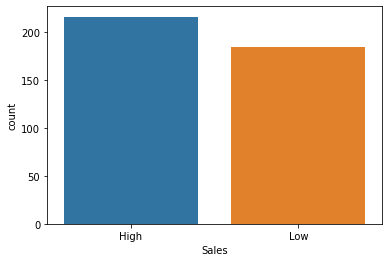

In [8]:
import seaborn as sns
sns.countplot(df['Sales'])

In [9]:
array=df.values
x=array[:,1:]
y=array[:,0]

In [10]:
kfold=KFold(n_splits=10)
model=RandomForestClassifier(n_estimators=100,max_features=3)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8400000000000001


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 10) (80, 10) (320,) (80,)


In [13]:
#training the model
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

#predicting sales
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)

In [35]:
result=rf_model.score(x_test,y_test)
result*100

78.75

In [36]:
rf_importance = rf_model.feature_importances_
FIM = pd.DataFrame({'Features':x.columns,'RandomForest Feature Importance' : rf_importance})
FIM = FIM.sort_values(by='RandomForest Feature Importance', ascending = False)
FIM

,Features,RandomForest Feature Importance
4,Price,0.263502
5,ShelveLoc,0.152978
6,Age,0.129107
1,Income,0.105656
0,CompPrice,0.105397
2,Advertising,0.086797
3,Population,0.076674
7,Education,0.052964
8,Urban,0.013762
9,US,0.013164


Text(0, 0.5, 'Features')

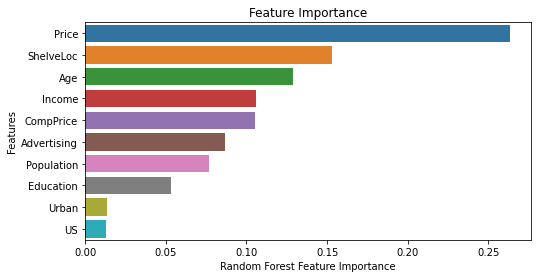

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.barplot(x= 'RandomForest Feature Importance', y='Features', data = FIM)
plt.title('Feature Importance')
plt.xlabel('Random Forest Feature Importance')
plt.ylabel('Features')